# Objective


- The goal of the project is to create a classifier capable of determining a plant's species from a photo.



Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.


# Import Libraries

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers


In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
import random
import os
import sys
import cv2

# Load Dataset

In [8]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')


In [9]:
data.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [10]:
image=np.load('/content/drive/My Drive/Colab Notebooks/images.npy')

In [11]:
image

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

## Shape

In [12]:
print('The shape of image is: ', image.shape)
# Extracting the height and width of an image 
h, w = image.shape[:2] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (4750, 128, 128, 3)
Height = 4750,  Width = 128


In [13]:
# Class y variables.
y = data["Label"]
# images X variables.
X = image

In [14]:
print(y[0])               # Label for 1st image.
print(y[2000])            # Label for 2001st image.

Small-flowered Cranesbill
Common Chickweed


In [15]:
y.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

In [16]:
y.value_counts().count()


12

## Visualize

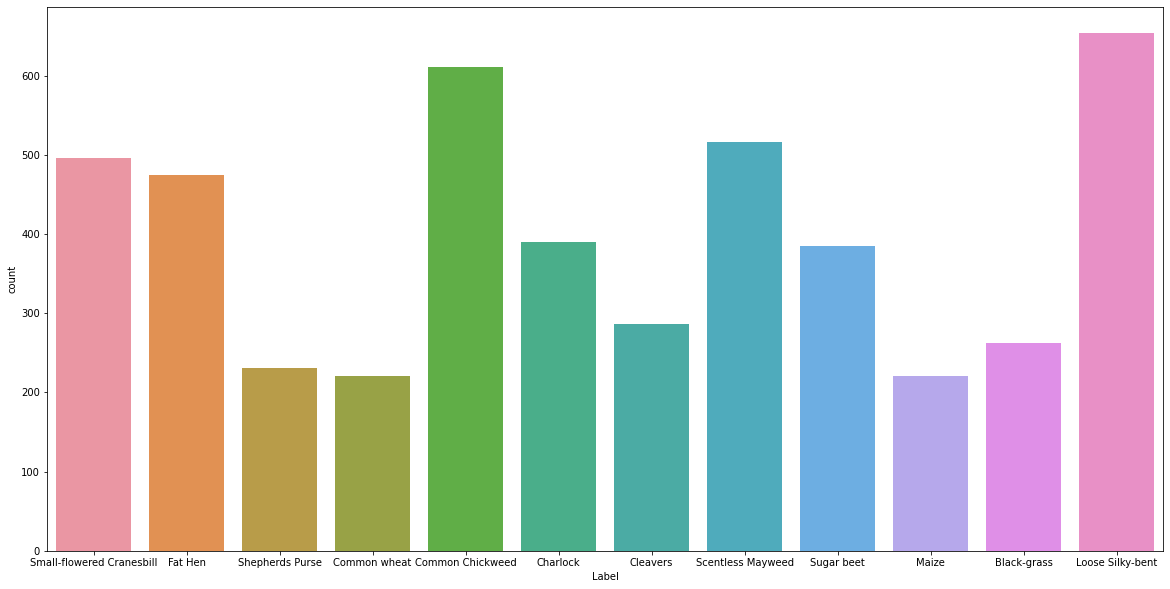

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(y)

# Data Pre Processing

## Apply gaussian blurring:
- The shape is of 2-D array is 128x128 pixels. 
- Then we apply gaussian blurring filter to each of the image.
- After applying filter, we have to convert the 2-D array to 1-D array. So that we can feed that into the traditional supervised learning algorithm as we did in the case above.

In [18]:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) # The shape of dataset tells us that there are 4750 numbers, each of which has 128*128*3 pixels. 
print(y.shape)

4750
(4750, 128, 128, 3)
(4750,)


- Its an array of 128x128 pixels 2-D array. 

In [19]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(X):
    X[idx] = cv2.GaussianBlur(src=img, ksize=(5, 5), sigmaX=1)

## Visualize data after pre-processing.

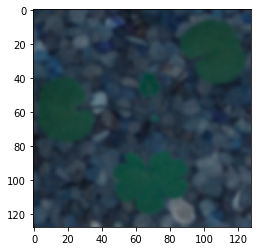

In [20]:
# Plot Gaussian blurred image
plt.imshow(X[1])

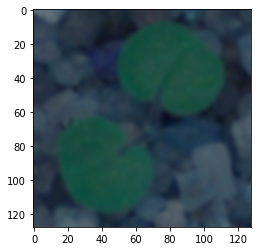

In [21]:
# Plot Gaussian blurred image
plt.imshow(X[200])

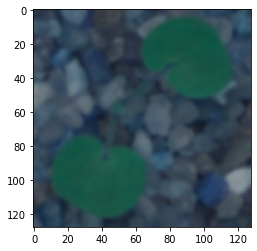

In [22]:
# Plot Gaussian blurred image
plt.imshow(X[100])

# Make data compatible

## Convert labels to one-hot-vectors
- convert class vectors (integers) to binary class matrix
- convert y labels
- number of classes: 12
- we are doing this to use categorical_crossentropy as loss

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#keras.utils.to_categorical(y)
#ohe = OneHotEncoder()
#ohe.fit_transform(y).toarray()
y=pd.get_dummies(y)


##Split the dataset into training, testing, and validation set.

In [24]:
# Split the data into train/val/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

## Normalize the *data*

In [25]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255

In [26]:
type(X_train) # the data to be fed into model is of the type numpy array.

numpy.ndarray

In [27]:
# Print shape of the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)


(3325, 128, 128, 3)
(3325, 12)
(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)


## Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- Hence Reshapping is not required , shap compatible with Keras model

# Building CNN

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (128, 128, 3) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- adding dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes =12 (Our case)

In [28]:
from tensorflow.keras.layers import Conv2D
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

model = Sequential()

model.add(Conv2D (128,(3,3) ,padding= 'valid', input_shape=(128, 128, 3)))
model.add(Activation ("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

model.add(Conv2D (64,(3,3) ,padding= 'valid'))
model.add(Activation ("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D (32,(3,3) ,padding= 'valid'))
model.add(Activation ("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))


model.add(Conv2D (16,(3,3) ,padding= 'valid'))
model.add(Activation ("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

### Compile and fit the model
- let's compile our model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- then next step will be to fit model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [29]:
# model.summary()

In [30]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
26/26 [==============================] - 12s 281ms/step - loss: 2.4530 - accuracy: 0.1210 - val_loss: 2.4426 - val_accuracy: 0.1376
Epoch 2/10
26/26 [==============================] - 4s 155ms/step - loss: 2.4195 - accuracy: 0.1423 - val_loss: 2.4183 - val_accuracy: 0.1461
Epoch 3/10
26/26 [==============================] - 4s 154ms/step - loss: 2.3796 - accuracy: 0.1718 - val_loss: 2.1412 - val_accuracy: 0.2683
Epoch 4/10
26/26 [==============================] - 4s 154ms/step - loss: 1.9933 - accuracy: 0.3282 - val_loss: 1.6131 - val_accuracy: 0.4593
Epoch 5/10
26/26 [==============================] - 4s 153ms/step - loss: 1.6479 - accuracy: 0.4099 - val_loss: 1.5474 - val_accuracy: 0.4902
Epoch 6/10
26/26 [==============================] - 4s 153ms/step - loss: 1.5450 - accuracy: 0.4402 - val_loss: 1.3707 - val_accuracy: 0.5267
Epoch 7/10
26/26 [==============================] - 4s 151ms/step - loss: 1.4497 - accuracy: 0.4847 - val_loss: 1.2894 - val_accuracy: 0.5506
Epoch

### Final loss and accuracy

In [31]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 1s 16ms/step - loss: 1.1114 - accuracy: 0.6320


[1.1113663911819458, 0.632022500038147]


# Confusion Matrix




In [32]:
from sklearn.metrics import classification_report, confusion_matrix
# Get model predictions on the test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test)

In [33]:
#print("=== Confusion Matrix ===")
cm = confusion_matrix(y_true, y_pred)
print(cm)

TypeError: ignored

# Visualize Prediction 

In [34]:
X_test[2], X_test[3], X_test[33], X_test[36], X_test[59]

(array([[[0.2       , 0.22352941, 0.25882354],
         [0.22352941, 0.24705882, 0.28235295],
         [0.25490198, 0.2901961 , 0.31764707],
         ...,
         [0.3137255 , 0.3529412 , 0.39215687],
         [0.34901962, 0.39215687, 0.41960785],
         [0.36862746, 0.4117647 , 0.43529412]],
 
        [[0.19607843, 0.21176471, 0.24705882],
         [0.21176471, 0.23137255, 0.2627451 ],
         [0.23921569, 0.26666668, 0.29411766],
         ...,
         [0.2784314 , 0.31764707, 0.36862746],
         [0.30980393, 0.34901962, 0.3882353 ],
         [0.32941177, 0.36862746, 0.4       ]],
 
        [[0.18431373, 0.19215687, 0.21960784],
         [0.19215687, 0.20392157, 0.22745098],
         [0.2       , 0.21960784, 0.24313726],
         ...,
         [0.21568628, 0.25490198, 0.32156864],
         [0.23137255, 0.26666668, 0.3254902 ],
         [0.24313726, 0.2784314 , 0.32941177]],
 
        ...,
 
        [[0.13725491, 0.1764706 , 0.24705882],
         [0.13725491, 0.1764706 , 0.24313